In [1]:
import pandas as pd
import numpy as np
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")
    


In [2]:
data=pd.read_csv('../data/BankNote_Authentication.csv')

In [3]:
from eda import EDA

edaCon=EDA(data)
missinPerc=edaCon.calculateMissingValues()

In [4]:
missinPerc

,Total Missing,Percentage Missing
variance,0.0,0.0
skewness,0.0,0.0
curtosis,0.0,0.0
entropy,0.0,0.0
class,0.0,0.0


In [5]:
data=edaCon.aboveThresholdMissing(.3)


In [6]:
data

In [7]:
data=edaCon.imputeColumnsMedian('entropy')


Imputing missing rows with median values of the feature
Done......!!!


In [8]:
data=edaCon.dropDuplicates()

Dropping Duplicates...

There are 24  duplicates in the dataset
Done Dropping duplicates!


In [9]:
cols=data.columns

In [10]:
cols

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [11]:
edaCon.imputeColumnsMode('entropy')

Imputing missing rows with mode values of the feature
Done......!!!


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [12]:
from univariate import Univariate


uniDat=Univariate(data)

In [13]:
entropyData=uniDat.calculateMetrics('entropy')
    

Reading data
Done
Calculating the univariate metrics of the columns entropy
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


In [14]:
entropyData

,Analysis Values
Mean,-1.168712
Mode,[-0.23751]
Median,-0.57889
Skew,-1.016054
Kurtosis,0.497362
Standard deviation,2.085103
Variance,4.347654


In [15]:
disMetrics=uniDat.calculateDispersion('entropy')

Calculating dispersion stats for entropy
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


In [16]:
disMetrics

,Dispersion Values
Q1,-2.393100
Q2,-0.578890
Q3,0.403863
Std deviation,2.085103
IQR,2.796963
Max Value,2.449500


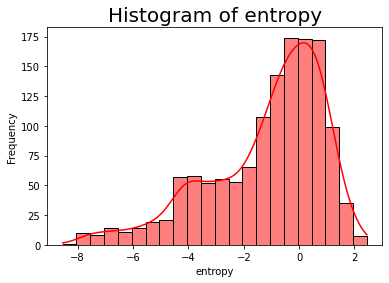

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


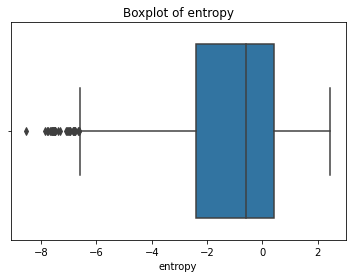

In [17]:
entHist=uniDat.vizualiseHist('entropy','r')

In [18]:
data['class'].unique()

array([0, 1], dtype=int64)

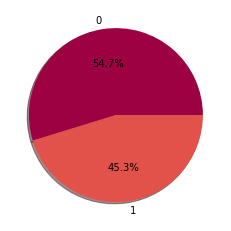

In [19]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(data['class'].value_counts(),labels=data['class'].unique(),shadow=True,colors=colors,autopct='%1.1f%%')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


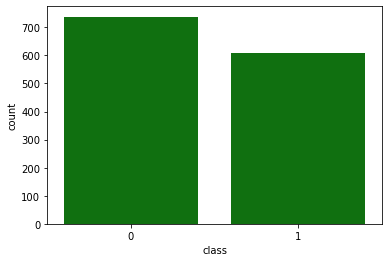

In [20]:
import seaborn as sns
sns.countplot(data['class'],order=data['class'].value_counts().iloc[:2].index,color='g')